# Autoencoders

### First a tour of image classifiers using NN

In [64]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [65]:
from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist

In [66]:
(X_train_full, y_train_full), (X_test, t_test) = fashion_mnist.load_data()


In [67]:
print(f'Shape of training data: {X_train_full.shape}, Datatype: {X_train_full.dtype}')

Shape of training data: (60000, 28, 28), Datatype: uint8


In [68]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

X_test = X_test / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


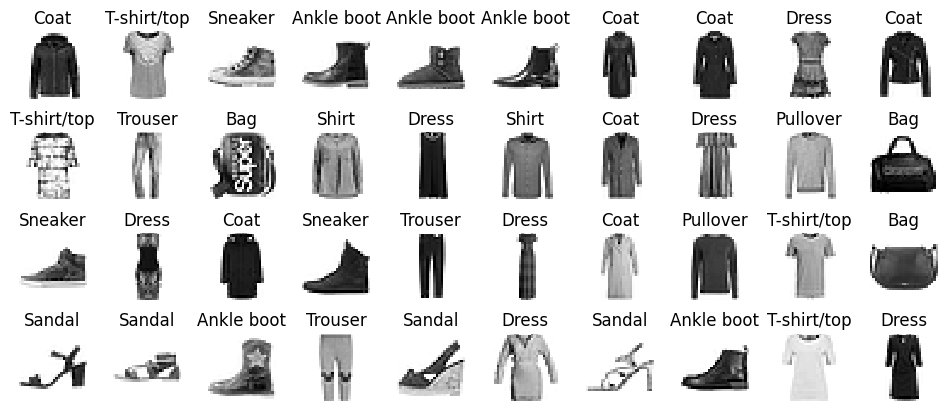

In [69]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(f'{class_names[y_train[index]]}', fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)



In [70]:
# defining a sequential model
model = keras.models.Sequential()
# converts each image from 28, 28 to 784
# It does not have any parameters
# Could add an Input layer instead
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# 300 neuron dense layer
# Relu activation function
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Could do it this way too

model_2 = keras.models.Sequential([
    keras.layers.Input([28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation= 'softmax')
])
# softmax activation function is used for multi class problems 





model.summary()



Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 300)               235500    
                                                                 
 dense_45 (Dense)            (None, 100)               30100     
                                                                 
 dense_46 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Model is made some details about this

we can look at the individual layers by calling model.layers    
model.layers returns a list, so we can index it   
each layer has a unique name that is autogenerated unless given a name specifically when constructed   
All the parameters for each layer can be seen or changed using get_weights / set_weights

The weights are initialized randomly

The input size is not needed however the model is not compiled until it knows the input size, so it is best to  
always give an inputsize



### Once the model is made we must call compile to specify the loss function and otpimizer 

loss function: optimization function   
optimizer: how to learn (batch gradient descent for example)   
you can also specify more metrics to keep track of   
One can als o pass in a class_weight saying whether or not a class is overrepresented or underrepresented  
higher weight underrepresented class, lower weight overrepresented class


In [71]:
# Sparse_categorical_crossentropy: we have sparse labels and the classes are exclusive
# SGD: stochastic gradient descent, e.g. the computer will do backprop for us finding gradients selecting 
# random number of samples each time to calculate gradient on 
# accuracy: good to keep track of in a classification problem
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])


In [72]:
# Pass in train data
# pass in number of epochs
# validation data is optional
# could pass validation_split instead of validation_data (it shuffles each time) 
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

In [73]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

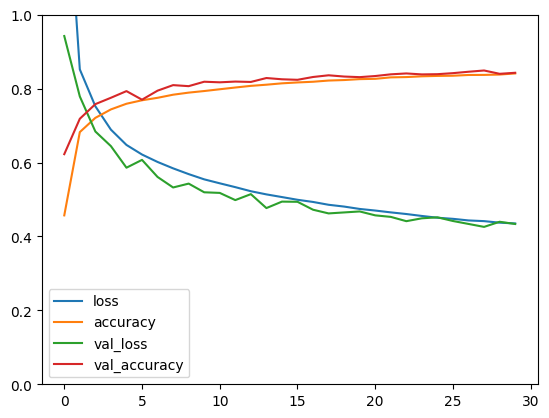

In [74]:
import pandas as pd

df = pd.DataFrame(history.history)

df.plot()
plt.gca().set_ylim(0,1)
plt.show()

## Building a youtube model

https://www.youtube.com/watch?v=jztwpsIzEGc&t=1331s&ab_channel=NicholasRenotte


2 APIS in keras for building models  
Sequential models are where we need one input and one output  
Functional models multiple inputs and outputs  


In [75]:
model_conv.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 8)         1160      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 3, 3, 8)           584       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 1, 1, 8)        

In [89]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential

model_conv = Sequential()
    # num filters, size of filter, stride between filters
    # all part of model architecture
model_conv.add(Conv2D(32, (3,3), 1, activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_conv.add(MaxPooling2D())

model_conv.add(Flatten())
model_conv.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_conv.add(Dense(10, activation='softmax'))





In [90]:
model_conv.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history = model_conv.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))


Epoch 1/40
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5575 - accuracy: 0.8048 - val_loss: 0.4215 - val_accuracy: 0.8566
Epoch 2/40
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3940 - accuracy: 0.8618 - val_loss: 0.3671 - val_accuracy: 0.8738
Epoch 3/40
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3503 - accuracy: 0.8764 - val_loss: 0.3305 - val_accuracy: 0.8874
Epoch 4/40
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3214 - accuracy: 0.8865 - val_loss: 0.3172 - val_accuracy: 0.8930
Epoch 5/40
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3012 - accuracy: 0.8928 - val_loss: 0.3105 - val_accuracy: 0.8890
Epoch 6/40
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2849 - accuracy: 0.8981 - val_loss: 0.2989 - val_accuracy: 0.8956
Epoch 7/40
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2707 - accuracy: 0.9035 - val_loss: 0.2859 - val_a

## Different model architectures:

All 30 epochs

Model1
conv2d 16, 3, 3, 1  
conv2d 8, 3, 3, 1  
maxpool2d  
conv2d 8, 3, 3, 1  
mnaxpool2d   
Flatten   
Dense 256  
Dense 10  
acc: 89.5  

Model2
Same as above but adding maxpool2d after first conv2d:
acc: 84.28

Model3  
conv 128  
maxpool  
conv 64  
maxpool  
conv 32  
maxpool  
dense 256  
dense 10  
acc: bad  


Model4:
conv2D 32, 3, 3,
maxpool2d(2, 2)
flatten
dense 128
dense 10
best acc 92%

Model6:
conv2D 32, 3, 3,
maxpool2d()
flatten
dense 128
dense 10



Model5:
conv2D 32, 6, 6,
maxpool2d(2, 2)
conv2d 16, 3, 3,
maxpool2d(2, 2)
flatten
dense 128
dense 10
best acc

Dense approach:
89.3




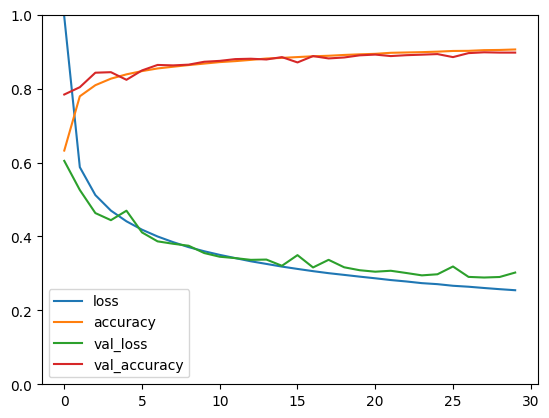

In [ ]:


df = pd.DataFrame(history.history)

df.plot()
plt.gca().set_ylim(0,1)
plt.show()